# Thanks Yassine Ghouzam for your amazing tutorial. It served as a basis for this notebook.

# 77.033 % accurate on Kaggle

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [139]:
from collections import Counter

In [140]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [141]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [143]:
len(train),len(test)

(891, 418)

In [144]:
# Detection of outliers
# Used the Tukey method (Tukey JW., 1977) for finding outliers
# Removing the rows which have more than n outliers
def outliers(df,n,columns): # dataframe, accepted outliers
    outliers_list = []
    for col in columns:
        q1 = np.percentile(df[col],25) #1st quartile
        q2 = np.percentile(df[col],75) #2nd quartile
        R = q2-q1 #inter quartile range
        OR = 1.5*R #outlier range
        outliers_col = df[ (df[col]<(q1-OR)) | (df[col]>(q2+OR)) ].index
        outliers_list.extend(outliers_col)
    
    outliers_list = Counter(outliers_list)
    outliers_list= list(i for i,j in outliers_list.items() if j>n)
    return outliers_list    

In [145]:
# Detecting outliers using the function
Outliers = outliers(train,2,["Age","SibSp","Parch","Fare"])

/home/rishikesh/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [146]:
train.iloc[Outliers]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [147]:
# Droping Outliers
train = train.drop(Outliers, axis = 0).reset_index(drop=True)

In [148]:
# joining train and test datasets
train_l = len(train)
data = pd.concat(objs=[train,test],axis=0).reset_index(drop=True)

/home/rishikesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [149]:
data = data.fillna(np.nan) # marking all missing values for counting
data.isnull().sum()

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [150]:
# filling fare value with median as only one value is missing
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [151]:
data['Embarked'] = data['Embarked'].fillna('S')
# Filling with most frequent value

In [152]:
data["Sex"] = data["Sex"].map({"male": 0, "female":1})

In [153]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [154]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


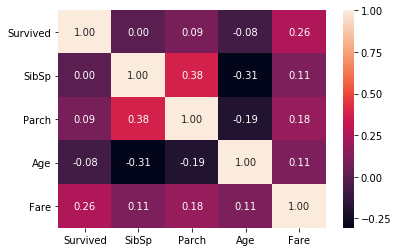

In [155]:
sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True,fmt = ".2f")
# only fare feature has a significant correlation with survival 

/home/rishikesh/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rishikesh/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


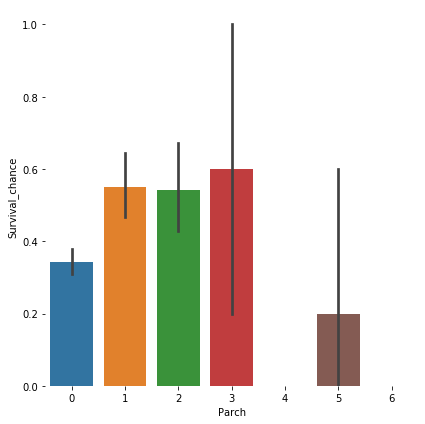

In [156]:
# Observing parch vs survived
g = sns.factorplot(x='Parch',y='Survived',data=train,kind ='bar',size=6)
g.despine(left=True,bottom=True)
g.set_ylabels('Survival_chance')

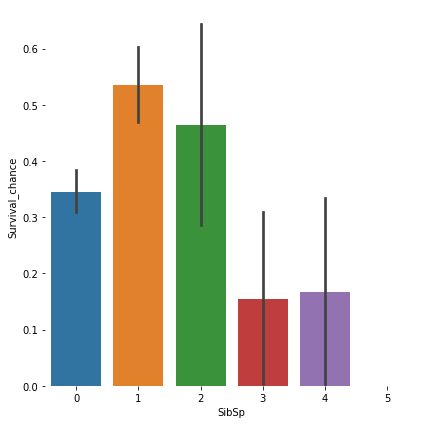

In [157]:
# Observing sibsp vs survived
g = sns.factorplot(x='SibSp',y='Survived',data=train,kind ='bar',size=6)
g.despine(left=True,bottom=True)
g.set_ylabels('Survival_chance')
# passengers with less siblings have high chances of survival 

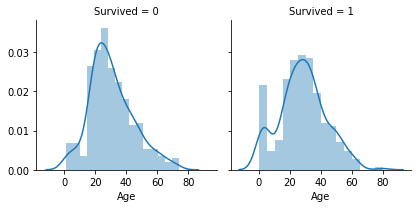

In [158]:
# Barplots are not appropriate for age and fare so using distplot with facetgrid
g = sns.FacetGrid(train,col='Survived')
g= g.map(sns.distplot,'Age')
# young passengers have high chances of survival 

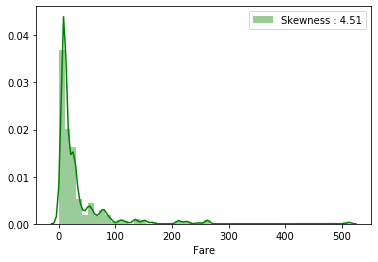

In [159]:
# Exploring fare
g = sns.distplot(data["Fare"], color="g", label="Skewness : %.2f"%(data["Fare"].skew()))
g = g.legend()
# Highly positively skewed

In [160]:
# This skewness will make the weights irregular hence better to transform it with log 
data['Fare'] = data['Fare'].map(lambda i : np.log(i) if i>0 else 0)

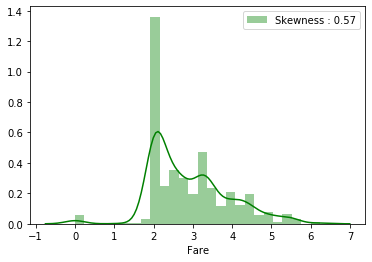

In [161]:
g = sns.distplot(data["Fare"], color="g", label="Skewness : %.2f"%(data["Fare"].skew()))
g = g.legend()
# skewness is significantly reduced

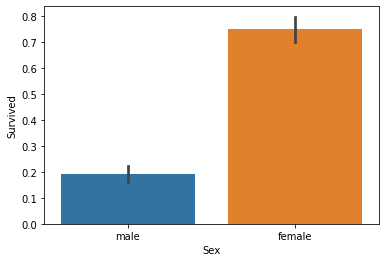

In [162]:
g = sns.barplot(x='Sex',y='Survived',data=train)
# Female had high chances of survival than male

In [163]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
0,0.190559
1,0.747573


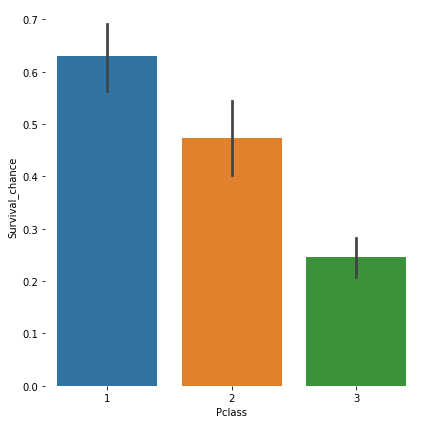

In [164]:
# Pclass vs survived
g = sns.factorplot(x='Pclass',y='Survived',data=train,kind ='bar',size=6)
g.despine(left=True,bottom=True)
g.set_ylabels('Survival_chance')

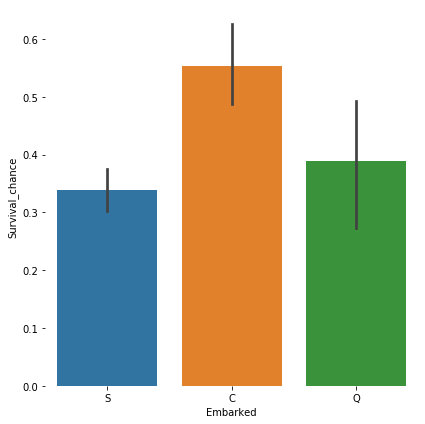

In [165]:
#Embarked vs Survived
g = sns.factorplot(x='Embarked',y='Survived',data=train,kind ='bar',size=6)
g.despine(left=True,bottom=True)
g.set_ylabels('Survival_chance')
#passengers Embarked from Cherbourg have high chances of survival 

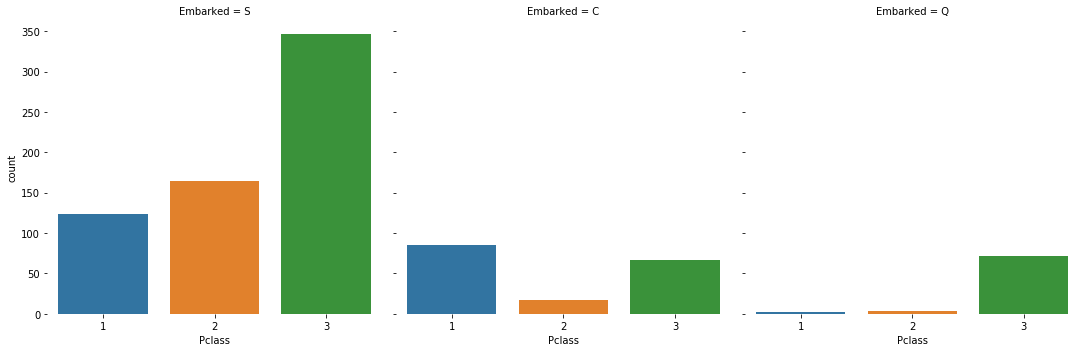

In [166]:
g = sns.factorplot("Pclass",col="Embarked",data=train,kind="count")
g.despine(left=True,bottom=True)
# C class has high number of passengers of pclass=1

Filling the missing values

/home/rishikesh/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/rishikesh/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/rishikesh/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'st

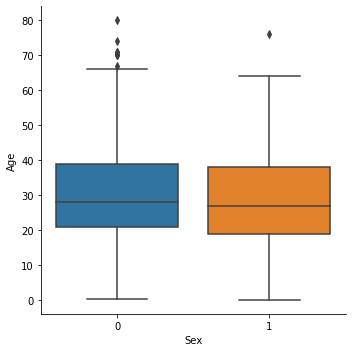

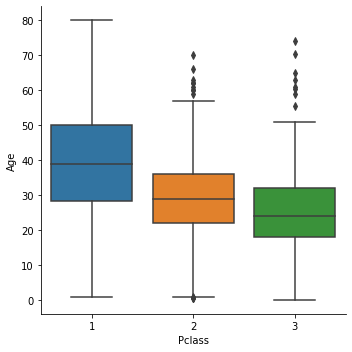

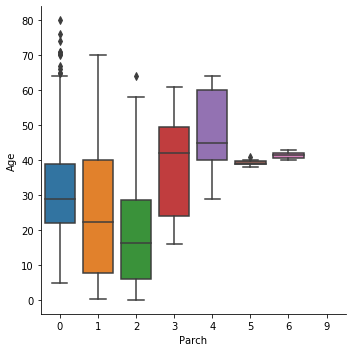

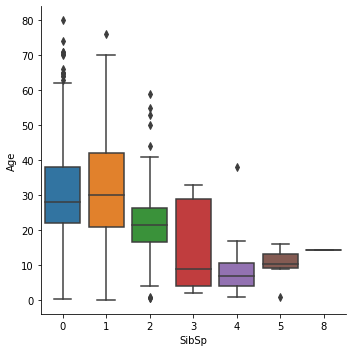

In [167]:
# For predicting the missing values of age
g = sns.factorplot(x='Sex',y='Age',data=data,kind='box')
g = sns.factorplot(x='Pclass',y='Age',data=data,kind='box')
g = sns.factorplot(x='Parch',y='Age',data=data,kind='box')
g = sns.factorplot(x='SibSp',y='Age',data=data,kind='box')
# Male and female has same age distribution so sex cannot be used to determine age
# Other features would be helpful having different distributions

In [168]:
# Filling missing values of age
null_age = list(data[data['Age'].isnull()].index)
# if the values corresponding to same sibsip,parch and pclass are present
# then median of them if not then median of age 
for i in null_age:
    med_age = data['Age'].median()
    # Brackets should be carefully placed
    similar_age = data['Age'][ (data['SibSp'][i]==data['SibSp']) & (data['Parch'][i]==data['Parch']) & (data['Pclass'][i]==data['Pclass']) ].median()
    if np.isnan(similar_age):
        data['Age'][i] = med_age
    else:
        data['Age'][i] = similar_age        

/home/rishikesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/rishikesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [169]:
# As peoples with good titles would be preferred during the evacuation so title serves as good feature
# Getting titles 
data_title = [ i.split(',')[1].split('.')[0].strip() for i in data['Name'] ] #Extracting titles, look at the names column you will get it
data['Title'] = pd.Series(data_title)

In [170]:
# As some titles are very less in number so converting them into 4 groups will be convenient
data["Title"] = data["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data["Title"] = data["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})

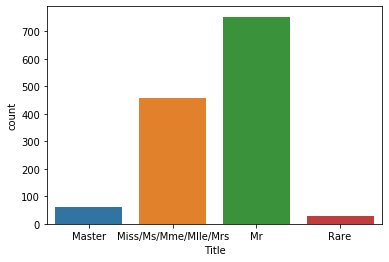

In [171]:
g = sns.countplot(data["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])
# you may think to add the mr group with master group but it will be clear in the following visualization 

/home/rishikesh/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/rishikesh/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


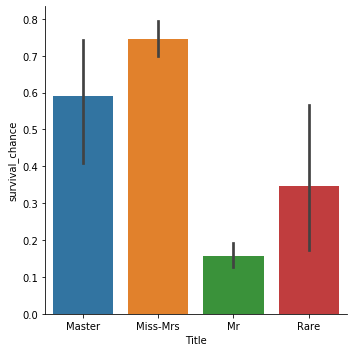

In [172]:
g = sns.factorplot(x="Title",y="Survived",data=data,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival_chance")

As Yassine pointed out correctly "Women and children first", it is clearly seen through survival chance.

In [173]:
# Dropping names
data.drop(labels='Name',axis=1,inplace=True)

In [174]:
# As family size feature will add more order to the data because bigger families will have difficulty in evacuating 
data['Fsize'] = data['Parch'] + data['SibSp'] +1 # Person himself

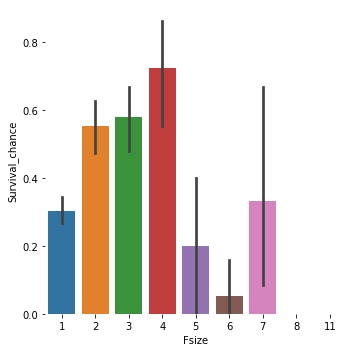

In [175]:
g = sns.factorplot(x="Fsize",y="Survived",data = data,kind='bar')
g = g.set_ylabels("Survival_chance")
g.despine(left=True,bottom=True)
# We can clearly see the large standard deviation in bigger families

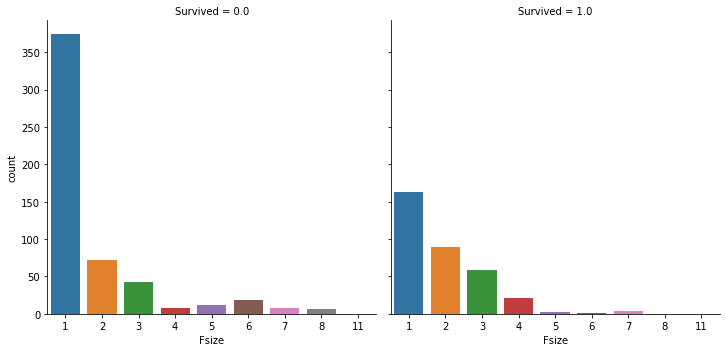

In [176]:
g = sns.factorplot('Fsize',col='Survived',data=data,kind='count')
# The above graph may create misconception about the data but this plot gives the true picture

In [177]:
# creating 4 groups out of all family sizes
data['Single'] = data['Fsize'].map(lambda s: 1 if s == 1 else 0)
data['SmallF'] = data['Fsize'].map(lambda s: 1 if 2 <= s <= 3  else 0)
data['MedF'] = data['Fsize'].map(lambda s: 1 if s == 4 else 0)
data['LargeF'] = data['Fsize'].map(lambda s: 1 if s >= 5 else 0)

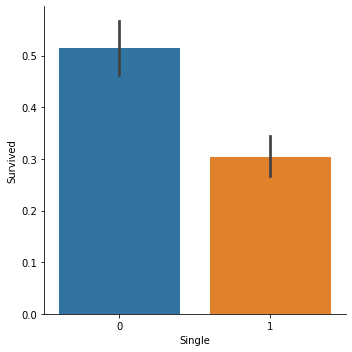

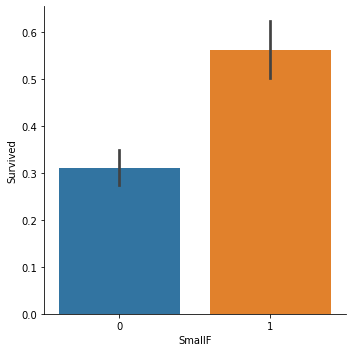

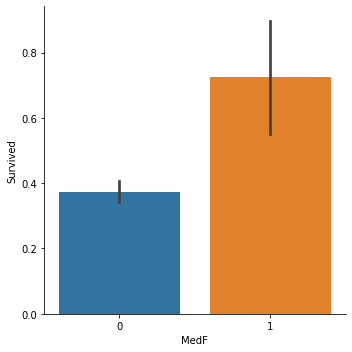

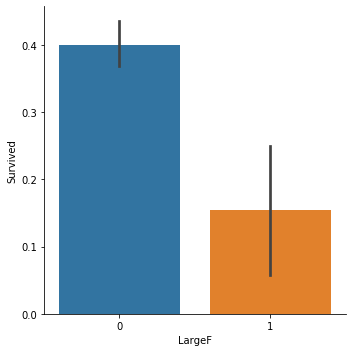

In [178]:
g = sns.factorplot(x="Single",y="Survived",data=data,kind="bar")
g = sns.factorplot(x="SmallF",y="Survived",data=data,kind="bar")
g = sns.factorplot(x="MedF",y="Survived",data=data,kind="bar")
g = sns.factorplot(x="LargeF",y="Survived",data=data,kind="bar")
# This split resulted in good features

In [179]:
# One hot encoding features
data = pd.get_dummies(data, columns = ["Title"], prefix='T')
data = pd.get_dummies(data, columns = ["Embarked"], prefix="Em")

In [180]:
data.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,...,SmallF,MedF,LargeF,T_0,T_1,T_2,T_3,Em_C,Em_Q,Em_S
0,22.0,NaN,1.981001,0,1,3,0,1,0.0,A/5 21171,...,1,0,0,0,0,1,0,0,0,1
1,38.0,C85,4.266662,0,2,1,1,1,1.0,PC 17599,...,1,0,0,0,1,0,0,1,0,0
2,26.0,NaN,2.070022,0,3,3,1,0,1.0,STON/O2. 3101282,...,0,0,0,0,1,0,0,0,0,1
3,35.0,C123,3.972177,0,4,1,1,1,1.0,113803,...,1,0,0,0,1,0,0,0,0,1
4,35.0,NaN,2.085672,0,5,3,0,0,0.0,373450,...,0,0,0,0,0,1,0,0,0,1


Coming to the next feature-Cabin

In [181]:
data['Cabin'].isnull().sum()

1007

In [182]:
data['Cabin'].describe()

count     292
unique    186
top        G6
freq        5
Name: Cabin, dtype: object

In [183]:
data["Cabin"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [184]:
# Replacing cabin name with their initial C85 with C and N if null'
cabin = [ i[0] if not pd.isnull(i) else 'N' for i in data['Cabin'] ]
cabin = pd.Series(cabin)
data['Cabin'] = cabin

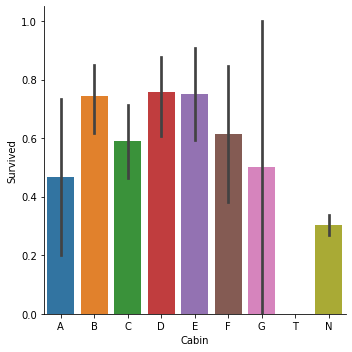

In [185]:
g = sns.factorplot(y="Survived",x="Cabin",data=data,kind="bar",order=['A','B','C','D','E','F','G','T','N'])
# Peoples without cabin have low survival chance

In [50]:
# As B,D and E have almost same suvival chnance and same standard deviation we will group them together
data['Cabin'] = data['Cabin'].replace(['B','D','E'],"BDE")
# Others have different standard deviation so we will not group them

In [51]:
data['Cabin'].head(7)

0      N
1      C
2      N
3      C
4      N
5      N
6    BDE
Name: Cabin, dtype: object

In [52]:
data = pd.get_dummies(data,columns=['Cabin'],prefix='Cab')

In [53]:
data.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fsize,...,Em_C,Em_Q,Em_S,Cab_A,Cab_BDE,Cab_C,Cab_F,Cab_G,Cab_N,Cab_T
0,22.0,1.981001,0,1,3,0,1,0.0,A/5 21171,2,...,0,0,1,0,0,0,0,0,1,0
1,38.0,4.266662,0,2,1,1,1,1.0,PC 17599,2,...,1,0,0,0,0,1,0,0,0,0
2,26.0,2.070022,0,3,3,1,0,1.0,STON/O2. 3101282,1,...,0,0,1,0,0,0,0,0,1,0
3,35.0,3.972177,0,4,1,1,1,1.0,113803,2,...,0,0,1,0,0,1,0,0,0,0
4,35.0,2.085672,0,5,3,0,0,0.0,373450,1,...,0,0,1,0,0,0,0,0,1,0


According to me cabins have considered different placements of passengers so ticket could be excluded from our data

In [54]:
data.drop(labels='Ticket',axis=1,inplace=True)

In [55]:
data["Pclass"] = data['Pclass'].astype('category') # For getting dummies
data = pd.get_dummies(data,columns=['Pclass'],prefix='Pc')

In [56]:
data.columns

Index(['Age', 'Fare', 'Parch', 'PassengerId', 'Sex', 'SibSp', 'Survived',
       'Fsize', 'Single', 'SmallF', 'MedF', 'LargeF', 'T_0', 'T_1', 'T_2',
       'T_3', 'Em_C', 'Em_Q', 'Em_S', 'Cab_A', 'Cab_BDE', 'Cab_C', 'Cab_F',
       'Cab_G', 'Cab_N', 'Cab_T', 'Pc_1', 'Pc_2', 'Pc_3'],
      dtype='object')

In [57]:
data.drop(labels='Fsize',axis=1,inplace=True)

In [58]:
data.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [63]:
# Separating training and testing  data
train = data[:train_l]
test = data[train_l:]
test.drop(labels=['Survived'],axis=1,inplace=True)
train['Survived'] = train['Survived'].astype(int)
Y_train = train['Survived']
X_train = train.drop(labels=['Survived'],axis=1)

/home/rishikesh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/rishikesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Fitting the models and tuning the parameters

In [100]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV ,cross_val_score, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [60]:
kfold = StratifiedKFold(n_splits=10)

In [66]:
classifiers = []
classifiers.append(SVC(random_state=5))
classifiers.append(GradientBoostingClassifier(random_state=5))

results = []
for classifier in classifiers:
    results.append( cross_val_score(classifier,X_train,y=Y_train,scoring='accuracy',cv=kfold) )

means = []
std_dev = []

for result in results:
    means.append(result.mean())
    std_dev.append(result.std())
    
cv_res = pd.DataFrame({'CrossValMeans':means, 'CrossValErrors':std_dev, 'Algorithm':['SVC','GradientBoosting']})

/home/rishikesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rishikesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rishikesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rishikesh/anaconda3/lib/python3.7/site-p

In [88]:
cv_res

,CrossValMeans,CrossValErrors,Algorithm
0,0.826341,0.042500,SVC
1,0.835419,0.042269,GradientBoosting


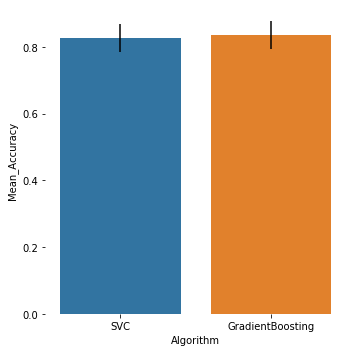

In [87]:
g = sns.factorplot(y='CrossValMeans',x='Algorithm',data = cv_res,kind = 'bar',**{'yerr':std_dev})
g = g.despine(left=True,bottom=True,right=True,top=True)
g.set_ylabels('Mean_Accuracy')

Hyperparameter Tuning for best models

In [90]:
# Tuning SVC parameters
svc_classifier = SVC(probability=True)
svc_param_grid = {'kernel':['rbf'],'gamma':[0.001, 0.01, 0.1, 1,10],'C':[1, 10, 50, 100,200,500, 1000]}
grid_svc = GridSearchCV(svc_classifier, param_grid = svc_param_grid, cv = kfold, scoring = 'accuracy',verbose=1)

grid_svc.fit(X_train,Y_train)

svc_best = grid_svc.best_estimator_
grid_svc.best_score_
# 82.63 -> 83.65

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   18.6s finished


0.8365493757094211

In [91]:
svc_best

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [118]:
# Second time tuning(SVC)
svc_classifier = SVC(probability=True)
svc_param_grid = {'kernel':['rbf'],'gamma':[0.007, 0.008, 0.009,0.01,0.02,0.03,0.04,0.05],'C':[7, 8, 9, 10,11,12, 13]}
grid_svc = GridSearchCV(svc_classifier, param_grid = svc_param_grid, cv = kfold, scoring = 'accuracy',verbose=1)

grid_svc.fit(X_train,Y_train)

svc_best2 = grid_svc.best_estimator_
grid_svc.best_score_
# 83.65 -> 83.99

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:  1.3min finished


0.8399545970488081

In [93]:
svc_best2

SVC(C=12, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [95]:
# Tuning GBC parameters
gbc = GradientBoostingClassifier()
gbc_param_grid = {'loss' : ["deviance"],'n_estimators' : [50,100,150,200,300],'learning_rate': [0.001,0.01,0.1,1],
              'max_depth': [4,6,8], 'min_samples_leaf': [50,100,150], 'max_features': [0.3, 0.1] }

grid_gbc = GridSearchCV(gbc,param_grid=gbc_param_grid, cv=kfold,scoring='accuracy',verbose=1 )

grid_gbc.fit(X_train,Y_train)

gbc_best = grid_gbc.best_estimator_
grid_gbc.best_score_
# 83.54 -> 83.99

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:  4.4min finished


0.8399545970488081

In [96]:
gbc_best

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [97]:
# Second time
gbc = GradientBoostingClassifier()
gbc_param_grid = {'loss' : ["deviance"],'n_estimators' : [130,140,150,160,170],'learning_rate': [0.07,0.08,0.09,0.1,0.2,0.3,0.4],
              'max_depth': [5,6,7], 'min_samples_leaf': [30,40,50,60,70], 'max_features': [0.3]}

grid_gbc = GridSearchCV(gbc,param_grid=gbc_param_grid, cv=kfold,scoring='accuracy',verbose=1 )

grid_gbc.fit(X_train,Y_train)

gbc_best2 = grid_gbc.best_estimator_
grid_gbc.best_score_
# 83.99 -> 84.79

Fitting 10 folds for each of 525 candidates, totalling 5250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5250 out of 5250 | elapsed:  9.9min finished


0.8479001135073779

In [98]:
gbc_best2

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.09, loss='deviance', max_depth=7,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=30, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=170,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [102]:
# Random Forest tunning
rfc = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],"max_features": [1, 3, 5, 10],"min_samples_split": [2, 3, 5,10],
              "min_samples_leaf": [1, 3, 10],"bootstrap": [False],"n_estimators" :[50,100,150,200,300],"criterion": ["gini"]}

grid_rfc = GridSearchCV(rfc,param_grid = rf_param_grid, cv=kfold, scoring="accuracy",verbose = 1)

grid_rfc.fit(X_train,Y_train)

rfc_best= grid_rfc.best_estimator_

# Best score
grid_rfc.best_score_

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:  5.9min finished


0.8433598183881952

In [104]:
rfc_best

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
# Random Forest tunning second time
rfc = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],"max_features": [9,10,11],"min_samples_split": [3],
              "min_samples_leaf": [3],"bootstrap": [False],"n_estimators" :[40,45,50,55,60,70,80],"criterion": ["gini"]}

grid_rfc = GridSearchCV(rfc,param_grid = rf_param_grid, cv=kfold, scoring="accuracy",verbose = 1)

grid_rfc.fit(X_train,Y_train)

rfc_best2 = grid_rfc.best_estimator_

# Best score
grid_rfc.best_score_
# accuracy decreased

Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:   14.4s finished


0.8388195232690124

In [106]:
rfc_best2

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=55,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
test_rfc = pd.Series(rfc_best.predict(test), name="rfc")
test_svc = pd.Series(svc_best2.predict(test), name="svc")
test_gbc = pd.Series(gbc_best2.predict(test), name="gbc")

# Concatenating all results
ensemble_results = pd.concat([test_rfc,test_svc,test_gbc],axis=1)

In [120]:
ensemble_results.head()

,rfc,svc,gbc
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,1,0


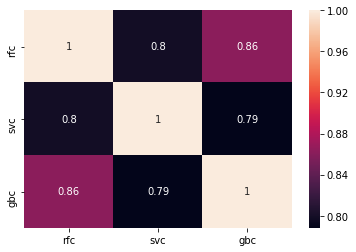

In [121]:
g= sns.heatmap(ensemble_results.corr(),annot=True)
# to see how correlated the predictions are

Combining models 

In [122]:
from sklearn.ensemble import VotingClassifier

In [123]:
voter = VotingClassifier(estimators=[('rfc',rfc_best),('svc',svc_best2),('gbc',gbc_best2)],voting='soft')
voting = voter.fit(X_train,Y_train)

In [129]:
t = pd.read_csv('test.csv')
Pid = t['PassengerId']

In [130]:
# Predicting results
test_results = pd.Series(voting.predict(test),name='Survived')

results = pd.concat([Pid,test_results],axis=1)

In [131]:
results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [133]:
results.to_csv("ensemble_voting.csv",index=False)
#75.598 on kaggle

In [134]:
test_results2 = pd.Series(gbc_best.predict(test),name='Survived')

results2 = pd.concat([Pid,test_results2],axis=1)
results2.to_csv("gbc_best_84.79.csv",index=False)
#77.033 on kaggle

In [135]:
test_results3 = pd.Series(svc_best.predict(test),name='Survived')

results3 = pd.concat([Pid,test_results3],axis=1)
results3.to_csv("svc_best_83.99.csv",index=False)
# 75.598 on kaggle

# Thank you !!